# **TPC2 MFES -** Pedro Almeida Fernandes pg47559 MEI



## **1. Futoshiki Puzzle**

Futoshiki é um puzzle lógico japonês jogado num tabuleiro N × N, onde são assinaladas restrições de desigualdade entre entre algumas posições contiguas do tabuleiro.

O objetivo é colocar os números 1..N de forma a que cada número não apareça repetido em cada linha nem em cada coluna do tabuleiro, e que as relações de desigualdade assinaladas sejam respeitadas. Alguns números podem estar fixos no tabuleiro inicial. Pode ver mais informações sobre o puzzle em:


*   http://en.wikipedia.org/wiki/Futoshiki
*   http://www.brainbashers.com/futoshiki.asp

Desenvolva um programa em Phyton para resolver este jogo como auxílio de um SMT
solver.
* **Input:** a configuração do tabuleiro inicial deverá ser fornecida num ficheiro de texto, em formato que entendam adquado para o descrever.
* **Output:** a solução do puzzle deverá ser impressa no ecrã.

### **Input tabuleiro 1:**

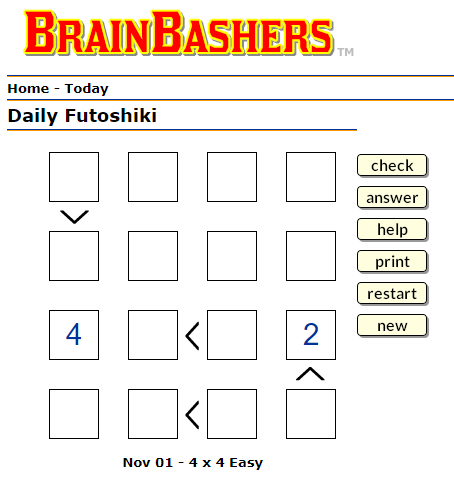

### **Output tabuleiro 1:**
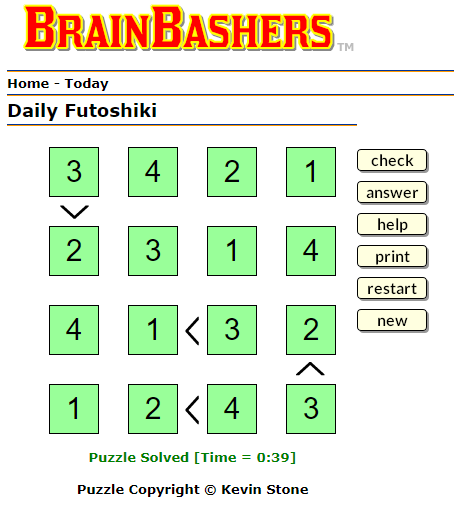

### **Input tabuleiro 2:**
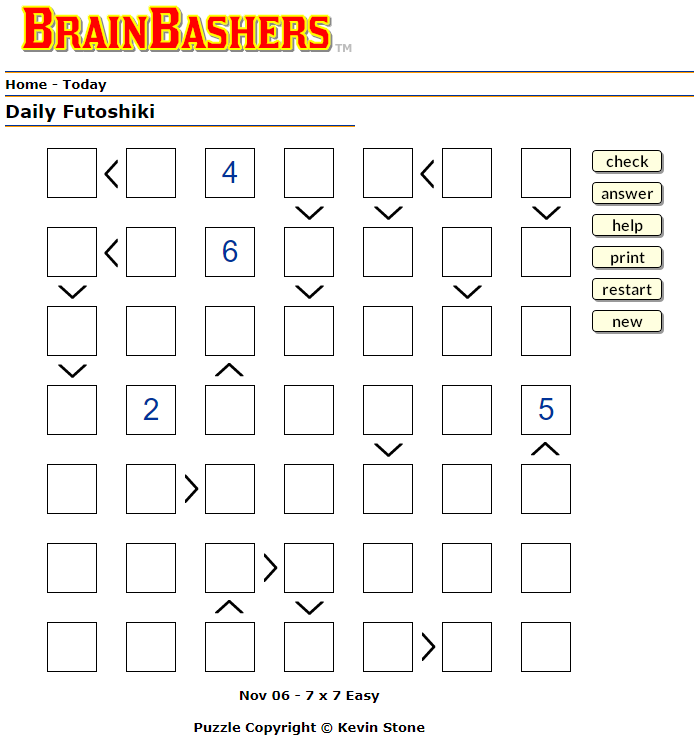

### **Output tabuleiro 2:**
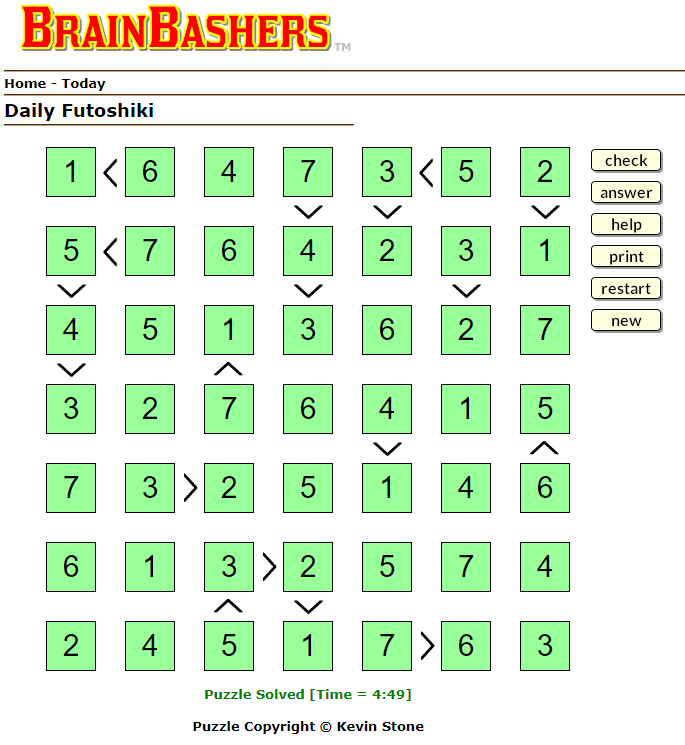

## **Estruturação do tabuleiro**
**Exemplo:**
```
4
|_|-|_|-|_|-|_|
|_|-|_|-|_|-|_|
|4|-|_|<|_|-|2|
|_|-|_|<|_|-|_|
|v|-|-|-|
|-|-|-|-|
|-|-|-|^|
```
O ficheiro texto está dividido em 3 partes, a primeira linha que contém a dimensão N do tabuleiro, seguido de N linhas que contém a informação de cada linha do tabuleiro e finalmente uma sequência de N-1 linhas para representar a informação entre linhas.

**Simbologia Usada**



*   **"Int" :** representa um número numa determinada célula;
*   **| :** simples separação de colunas;
*   **_ :** células que estão por preencher;
*   **- :** representa a ausência de comparações entre células;
*   **> :** célula x[ i ][ j ] > x[ i ][ j+1 ];
*   **< :** célula x[ i ][ j ] < x[ i ][ j+1 ];
*   **v :** célula x[ i ][ j ] > x[ i+1 ][ j ];
*   **^ :** célula x[ i ][ j ] < x[ i+1 ][ j ].













In [ ]:
!pip install z3-solver

## **Formulação das Restrições:**

In [ ]:
from z3 import *
import re

### Tabuleiro 1

In [ ]:
board = """4
|_|-|_|-|_|-|_|
|_|-|_|-|_|-|_|
|4|-|_|<|_|-|2|
|_|-|_|<|_|-|_|
|v|-|-|-|
|-|-|-|-|
|-|-|-|^|"""

print("Foi Selecionado o Tabuleiro 1!")

Foi Selecionado o Tabuleiro 1!


### Tabuleiro 2

In [ ]:
board = """7
|_|<|_|-|4|-|_|-|_|<|_|-|_|
|_|<|_|-|6|-|_|-|_|-|_|-|_|
|_|-|_|-|_|-|_|-|_|-|_|-|_|
|_|-|2|-|_|-|_|-|_|-|_|-|5|
|_|-|_|>|_|-|_|-|_|-|_|-|_|
|_|-|_|-|_|>|_|-|_|-|_|-|_|
|_|-|_|-|_|-|_|-|_|>|_|-|_|
|-|-|-|v|v|-|v|
|v|-|-|v|-|v|-|
|v|-|^|-|-|-|-|
|-|-|-|-|v|-|^|
|-|-|-|-|-|-|-|
|-|-|^|v|-|-|-|
"""

print("Foi Selecionado o Tabuleiro 2!")

Foi Selecionado o Tabuleiro 2!


### Criação Restrições

In [ ]:
x = {}
s = Solver()


N = 0

lines = board.split('\n')

N = int(lines[0])

#------------------------------------------------------------------------------
#  Desigualdades para os limites inferior e superior das constantes
#------------------------------------------------------------------------------
for i in range(N):
  x[i] = {}
  for j in range(N):
     x[i][j] = Int('x'+str(i)+str(j))       # declaração de variáveis
     s.add(And(1<= x[i][j], x[i][j]<=N))    # restrições de valor

#------------------------------------------------------------------------------
#  Leitura do tabuleiro
#------------------------------------------------------------------------------

popLines = lines.pop(0)

j1 = 0
j2 = 0
i2 = 0

for i1 in range(2*N-1):
 
  if ( i1 < N):
    for char in lines[i1] :
      if char.isdigit() :
        s.add(x[i1][j1] == int(char))
        j1 += 1

      elif char == "_" :
        j1 +=1

      elif char == "<" :
        s.add(x[i1][j1-1] < x[i1][j1])

      elif char == ">" :
        s.add(x[i1][j1-1] > x[i1][j1])
    
    j1 = 0

  else:
    for char in lines[i1] :
      if char == "v" :
        s.add(x[i2][j2] > x[i2+1][j2])
        j2+=1

      elif char =="^" :
        s.add(x[i2][j2] < x[i2+1][j2])
        j2+=1

      elif char =="-" :
        j2+=1

    j2 = 0
    i2 += 1
 
#------------------------------------------------------------------------------
# Restrições do tipo “todos diferentes”, uma para cada linha e coluna da matriz
#------------------------------------------------------------------------------

print("\n")
for i in x:
  for j in x:
    for z in range(N):
        if ( z != i ):
          s.add(x[i][j] != x[z][j])
        if ( z != j ):
          s.add(x[i][j] != x[i][z])

## **Solução do tabuleiro:**

In [ ]:
if s.check() == sat:
    m = s.model()
    print("(Sat) A solução é a seguinte!")
    r = [ [ m.evaluate(x[i][j]) for j in range(N) ]
          for i in range(N) ]
    
    for i in range(N):
      print(r[i])

    
else:
    print("Unsat")

(Sat) A solução é a seguinte!
[1, 6, 4, 7, 3, 5, 2]
[5, 7, 6, 4, 2, 3, 1]
[4, 5, 1, 3, 6, 2, 7]
[3, 2, 7, 6, 4, 1, 5]
[7, 3, 2, 5, 1, 4, 6]
[6, 1, 3, 2, 5, 7, 4]
[2, 4, 5, 1, 7, 6, 3]
